# Synthetic Population

Statistical reporting only provides us with aggegated data. From these data we can extract the marginals for the population features. With these marginals, we can define a base population with equal chatacteristics as the actual population. Using Interative Proportional Fitting (IFP) we can create a dataset with pseudo-individuals drawn from this synthetic population.

In [1]:
import pandas as pd
import numpy as np
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import entropy

In [2]:
age_new =    '../data/destatis/age_new.csv'
age_term =   '../data/destatis/age_term.csv'
areas_new =  '../data/destatis/areas_new.csv'
areas_term = '../data/destatis/areas_term.csv'
edu_new =    '../data/destatis/edu_new.csv'
edu_term =   '../data/destatis/edu_term.csv'

In [3]:
files = ['age_new', 'age_term', 'areas_new', 'areas_term', 'edu_term_new', 'edu_term_term']

***
# AGE

In [4]:
df_age_new = pd.read_csv(age_new, sep=';')
df_age_new

,statistics_code,statistics_label,time_code,time_label,time,1_variable_code,1_variable_label,1_variable_attribute_code,1_variable_attribute_label,2_variable_code,...,2_variable_attribute_code,2_variable_attribute_label,3_variable_code,3_variable_label,3_variable_attribute_code,3_variable_attribute_label,value,value_unit,value_variable_code,value_variable_label
0,21211,Berufsbildungsstatistik,JAHR,Jahr,2017,DLAND,Bundesländer,3,Niedersachsen,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT022,22-Jährige,1059,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
1,21211,Berufsbildungsstatistik,JAHR,Jahr,2021,DLAND,Bundesländer,12,Brandenburg,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT023,23-Jährige,207,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
2,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,11,Berlin,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT019,19-Jährige,1074,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
3,21211,Berufsbildungsstatistik,JAHR,Jahr,2013,DLAND,Bundesländer,14,Sachsen,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT021,21-Jährige,645,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
4,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,14,Sachsen,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT024UM,24 Jahre und mehr,1077,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,21211,Berufsbildungsstatistik,JAHR,Jahr,2018,DLAND,Bundesländer,9,Bayern,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT000B17,unter 17 Jahre,8175,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
3164,21211,Berufsbildungsstatistik,JAHR,Jahr,2014,DLAND,Bundesländer,3,Niedersachsen,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT020,20-Jährige,4014,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
3165,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,8,Baden-Württemberg,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT019,19-Jährige,5127,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
3166,21211,Berufsbildungsstatistik,JAHR,Jahr,2017,DLAND,Bundesländer,12,Brandenburg,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT022,22-Jährige,291,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge


In [5]:
df_age_new = df_age_new[[
    'time',
    '1_variable_attribute_label',
    '2_variable_attribute_label',
    '3_variable_attribute_label',
    'value'
]]

df_age_new = df_age_new.rename(columns={
    'time': 'year',
    '1_variable_attribute_label': 'state',
    '2_variable_attribute_label': 'gender',
    '3_variable_attribute_label': 'age',
    'value': 'count'
})
df_age_new['count'] = df_age_new['count'].replace("-", "0")
df_age_new['count'] = pd.to_numeric(df_age_new['count'], errors='coerce')
df_age_new

,year,state,gender,age,count
0,2017,Niedersachsen,weiblich,22-Jährige,1059
1,2021,Brandenburg,männlich,23-Jährige,207
2,2016,Berlin,weiblich,19-Jährige,1074
3,2013,Sachsen,männlich,21-Jährige,645
4,2019,Sachsen,männlich,24 Jahre und mehr,1077
...,...,...,...,...,...
3163,2018,Bayern,weiblich,unter 17 Jahre,8175
3164,2014,Niedersachsen,männlich,20-Jährige,4014
3165,2016,Baden-Württemberg,weiblich,19-Jährige,5127
3166,2017,Brandenburg,männlich,22-Jährige,291


In [6]:
df_age_term = pd.read_csv(age_term, sep=';')
df_age_term

,statistics_code,statistics_label,time_code,time_label,time,1_variable_code,1_variable_label,1_variable_attribute_code,1_variable_attribute_label,2_variable_code,...,2_variable_attribute_code,2_variable_attribute_label,3_variable_code,3_variable_label,3_variable_attribute_code,3_variable_attribute_label,value,value_unit,value_variable_code,value_variable_label
0,21211,Berufsbildungsstatistik,JAHR,Jahr,2017,DLAND,Bundesländer,3,Niedersachsen,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT022,22-Jährige,525,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
1,21211,Berufsbildungsstatistik,JAHR,Jahr,2021,DLAND,Bundesländer,12,Brandenburg,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT023,23-Jährige,129,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
2,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,11,Berlin,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT019,19-Jährige,396,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
3,21211,Berufsbildungsstatistik,JAHR,Jahr,2013,DLAND,Bundesländer,14,Sachsen,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT021,21-Jährige,324,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
4,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,14,Sachsen,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT024UM,24 Jahre und mehr,540,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,21211,Berufsbildungsstatistik,JAHR,Jahr,2018,DLAND,Bundesländer,9,Bayern,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT000B17,unter 17 Jahre,786,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
3164,21211,Berufsbildungsstatistik,JAHR,Jahr,2014,DLAND,Bundesländer,3,Niedersachsen,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT020,20-Jährige,1401,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
3165,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,8,Baden-Württemberg,GES,...,GESW,weiblich,ALT019,Altersjahre (u17-24m),ALT019,19-Jährige,1251,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
3166,21211,Berufsbildungsstatistik,JAHR,Jahr,2017,DLAND,Bundesländer,12,Brandenburg,GES,...,GESM,männlich,ALT019,Altersjahre (u17-24m),ALT022,22-Jährige,159,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge


In [7]:
df_age_term = df_age_term[[
    'time',
    '1_variable_attribute_label',
    '2_variable_attribute_label',
    '3_variable_attribute_label',
    'value'
]]

df_age_term = df_age_term.rename(columns={
    'time': 'year',
    '1_variable_attribute_label': 'state',
    '2_variable_attribute_label': 'gender',
    '3_variable_attribute_label': 'age',
    'value': 'count'
})
df_age_term['count'] = df_age_term['count'].replace("-", "0")
df_age_term['count'] = pd.to_numeric(df_age_term['count'], errors='coerce')
df_age_term

,year,state,gender,age,count
0,2017,Niedersachsen,weiblich,22-Jährige,525
1,2021,Brandenburg,männlich,23-Jährige,129
2,2016,Berlin,weiblich,19-Jährige,396
3,2013,Sachsen,männlich,21-Jährige,324
4,2019,Sachsen,männlich,24 Jahre und mehr,540
...,...,...,...,...,...
3163,2018,Bayern,weiblich,unter 17 Jahre,786
3164,2014,Niedersachsen,männlich,20-Jährige,1401
3165,2016,Baden-Württemberg,weiblich,19-Jährige,1251
3166,2017,Brandenburg,männlich,22-Jährige,159


***
# SECTOR

In [8]:
df_areas_new = pd.read_csv(areas_new, sep=';')
df_areas_new

,statistics_code,statistics_label,time_code,time_label,time,1_variable_code,1_variable_label,1_variable_attribute_code,1_variable_attribute_label,2_variable_code,...,3_variable_attribute_code,3_variable_attribute_label,4_variable_code,4_variable_label,4_variable_attribute_code,4_variable_attribute_label,value,value_unit,value_variable_code,value_variable_label
0,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,1,Schleswig-Holstein,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,-,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
1,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,14,Sachsen,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,171,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
2,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,15,Sachsen-Anhalt,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESM,männlich,3885,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
3,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,6,Hessen,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,477,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
4,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,7,Rheinland-Pfalz,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESM,männlich,147,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,21211,Berufsbildungsstatistik,JAHR,Jahr,2020,DLAND,Bundesländer,14,Sachsen,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESM,männlich,6,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
4220,21211,Berufsbildungsstatistik,JAHR,Jahr,2021,DLAND,Bundesländer,11,Berlin,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,0,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
4221,21211,Berufsbildungsstatistik,JAHR,Jahr,2022,DLAND,Bundesländer,4,Bremen,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESM,männlich,600,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
4222,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,3,Niedersachsen,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESW,weiblich,11376,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge


In [9]:
df_areas_new = df_areas_new[[
    'time',
    '1_variable_attribute_label',
    '2_variable_attribute_label',
    '3_variable_attribute_label',
    '4_variable_attribute_label',
    'value'
]]

df_areas_new = df_areas_new.rename(columns={
    'time': 'year',
    '1_variable_attribute_label': 'state',
    '2_variable_attribute_label': 'sector',
    '3_variable_attribute_label': 'nationality',
    '4_variable_attribute_label': 'gender',
    'value': 'count'
})
df_areas_new['count'] = df_areas_new['count'].replace("-", "0")
df_areas_new['count'] = pd.to_numeric(df_areas_new['count'], errors='coerce')
df_areas_new

,year,state,sector,nationality,gender,count
0,2016,Schleswig-Holstein,Öffentlicher Dienst,Ausländer,weiblich,0
1,2019,Sachsen,Industrie und Handel,Ausländer,weiblich,171
2,2019,Sachsen-Anhalt,Industrie und Handel,Deutsche,männlich,3885
3,2015,Hessen,Freie Berufe,Ausländer,weiblich,477
4,2015,Rheinland-Pfalz,Freie Berufe,Deutsche,männlich,147
...,...,...,...,...,...,...
4219,2020,Sachsen,Freie Berufe,Ausländer,männlich,6
4220,2021,Berlin,Hauswirtschaft,Ausländer,weiblich,0
4221,2022,Bremen,Handwerk,Deutsche,männlich,600
4222,2015,Niedersachsen,Industrie und Handel,Deutsche,weiblich,11376


In [10]:
df_areas_term = pd.read_csv(areas_term, sep=';')
df_areas_term

,statistics_code,statistics_label,time_code,time_label,time,1_variable_code,1_variable_label,1_variable_attribute_code,1_variable_attribute_label,2_variable_code,...,3_variable_attribute_code,3_variable_attribute_label,4_variable_code,4_variable_label,4_variable_attribute_code,4_variable_attribute_label,value,value_unit,value_variable_code,value_variable_label
0,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,1,Schleswig-Holstein,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,-,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
1,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,14,Sachsen,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,81,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
2,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,15,Sachsen-Anhalt,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESM,männlich,1245,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
3,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,6,Hessen,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,138,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
4,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,7,Rheinland-Pfalz,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESM,männlich,42,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,21211,Berufsbildungsstatistik,JAHR,Jahr,2020,DLAND,Bundesländer,14,Sachsen,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESM,männlich,6,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
4220,21211,Berufsbildungsstatistik,JAHR,Jahr,2021,DLAND,Bundesländer,11,Berlin,AUSB1,...,NATA,Ausländer,GES,Geschlecht,GESW,weiblich,0,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
4221,21211,Berufsbildungsstatistik,JAHR,Jahr,2022,DLAND,Bundesländer,4,Bremen,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESM,männlich,273,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
4222,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,3,Niedersachsen,AUSB1,...,NATD,Deutsche,GES,Geschlecht,GESW,weiblich,2973,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge


In [11]:
df_areas_term = df_areas_term[[
    'time',
    '1_variable_attribute_label',
    '2_variable_attribute_label',
    '3_variable_attribute_label',
    '4_variable_attribute_label',
    'value'
]]

df_areas_term = df_areas_term.rename(columns={
    'time': 'year',
    '1_variable_attribute_label': 'state',
    '2_variable_attribute_label': 'sector',
    '3_variable_attribute_label': 'nationality',
    '4_variable_attribute_label': 'gender',
    'value': 'count'
})
df_areas_term['count'] = df_areas_term['count'].replace("-", "0")
df_areas_term['count'] = pd.to_numeric(df_areas_term['count'], errors='coerce')
df_areas_term

,year,state,sector,nationality,gender,count
0,2016,Schleswig-Holstein,Öffentlicher Dienst,Ausländer,weiblich,0
1,2019,Sachsen,Industrie und Handel,Ausländer,weiblich,81
2,2019,Sachsen-Anhalt,Industrie und Handel,Deutsche,männlich,1245
3,2015,Hessen,Freie Berufe,Ausländer,weiblich,138
4,2015,Rheinland-Pfalz,Freie Berufe,Deutsche,männlich,42
...,...,...,...,...,...,...
4219,2020,Sachsen,Freie Berufe,Ausländer,männlich,6
4220,2021,Berlin,Hauswirtschaft,Ausländer,weiblich,0
4221,2022,Bremen,Handwerk,Deutsche,männlich,273
4222,2015,Niedersachsen,Industrie und Handel,Deutsche,weiblich,2973


In [12]:
result = df_areas_term.groupby(['year', 'state', 'nationality'], as_index=False)['count'].sum()
print(result)

     year               state nationality  count
0    2013   Baden-Württemberg   Ausländer   2688
1    2013   Baden-Württemberg    Deutsche  14808
2    2013              Bayern   Ausländer   2496
3    2013              Bayern    Deutsche  20085
4    2013              Berlin   Ausländer    618
..    ...                 ...         ...    ...
347  2023      Sachsen-Anhalt    Deutsche   3411
348  2023  Schleswig-Holstein   Ausländer    828
349  2023  Schleswig-Holstein    Deutsche   5529
350  2023           Thüringen   Ausländer    396
351  2023           Thüringen    Deutsche   3219

[352 rows x 4 columns]


***
# EDUCATION

In [13]:
df_edu_new = pd.read_csv(edu_new, sep=';')
df_edu_new

,statistics_code,statistics_label,time_code,time_label,time,1_variable_code,1_variable_label,1_variable_attribute_code,1_variable_attribute_label,2_variable_code,...,2_variable_attribute_code,2_variable_attribute_label,3_variable_code,3_variable_label,3_variable_attribute_code,3_variable_attribute_label,value,value_unit,value_variable_code,value_variable_label
0,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,11,Berlin,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS12,Hauptschulabschluss,1407,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
1,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,15,Sachsen-Anhalt,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS11,Ohne Hauptschulabschluss,321,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
2,21211,Berufsbildungsstatistik,JAHR,Jahr,2014,DLAND,Bundesländer,6,Hessen,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS11,Ohne Hauptschulabschluss,903,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
3,21211,Berufsbildungsstatistik,JAHR,Jahr,2018,DLAND,Bundesländer,11,Berlin,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS27,Hochschul- oder Fachhochschulreife,2979,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
4,21211,Berufsbildungsstatistik,JAHR,Jahr,2020,DLAND,Bundesländer,4,Bremen,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,723,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,21211,Berufsbildungsstatistik,JAHR,Jahr,2018,DLAND,Bundesländer,9,Bayern,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS98,Im Ausland erworbener Abschluss (nicht zuorden...,1434,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
1756,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,6,Hessen,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,5088,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
1757,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,7,Rheinland-Pfalz,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,3861,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge
1758,21211,Berufsbildungsstatistik,JAHR,Jahr,2013,DLAND,Bundesländer,8,Baden-Württemberg,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,14445,Anzahl,BIL041,Neu abgeschlossene Ausbildungsverträge


In [14]:
df_edu_new = df_edu_new[[
    'time',
    '1_variable_attribute_label',
    '2_variable_attribute_label',
    '3_variable_attribute_label',
    'value'
]]

df_edu_new = df_edu_new.rename(columns={
    'time': 'year',
    '1_variable_attribute_label': 'state',
    '2_variable_attribute_label': 'gender',
    '3_variable_attribute_label': 'education',
    'value': 'count'
})
df_edu_new['count'] = df_edu_new['count'].replace("-", "0")
df_edu_new['count'] = pd.to_numeric(df_edu_new['count'], errors='coerce')
df_edu_new

,year,state,gender,education,count
0,2015,Berlin,weiblich,Hauptschulabschluss,1407
1,2019,Sachsen-Anhalt,männlich,Ohne Hauptschulabschluss,321
2,2014,Hessen,männlich,Ohne Hauptschulabschluss,903
3,2018,Berlin,männlich,Hochschul- oder Fachhochschulreife,2979
4,2020,Bremen,weiblich,Realschul- oder vergleichbarer Abschluss,723
...,...,...,...,...,...
1755,2018,Bayern,männlich,Im Ausland erworbener Abschluss (nicht zuorden...,1434
1756,2019,Hessen,weiblich,Realschul- oder vergleichbarer Abschluss,5088
1757,2016,Rheinland-Pfalz,weiblich,Realschul- oder vergleichbarer Abschluss,3861
1758,2013,Baden-Württemberg,weiblich,Realschul- oder vergleichbarer Abschluss,14445


In [15]:
df_edu_term = pd.read_csv(edu_term, sep=';')
df_edu_term

,statistics_code,statistics_label,time_code,time_label,time,1_variable_code,1_variable_label,1_variable_attribute_code,1_variable_attribute_label,2_variable_code,...,2_variable_attribute_code,2_variable_attribute_label,3_variable_code,3_variable_label,3_variable_attribute_code,3_variable_attribute_label,value,value_unit,value_variable_code,value_variable_label
0,21211,Berufsbildungsstatistik,JAHR,Jahr,2015,DLAND,Bundesländer,11,Berlin,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS12,Hauptschulabschluss,816,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
1,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,15,Sachsen-Anhalt,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS11,Ohne Hauptschulabschluss,174,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
2,21211,Berufsbildungsstatistik,JAHR,Jahr,2014,DLAND,Bundesländer,6,Hessen,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS11,Ohne Hauptschulabschluss,294,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
3,21211,Berufsbildungsstatistik,JAHR,Jahr,2018,DLAND,Bundesländer,11,Berlin,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS27,Hochschul- oder Fachhochschulreife,684,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
4,21211,Berufsbildungsstatistik,JAHR,Jahr,2020,DLAND,Bundesländer,4,Bremen,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,225,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,21211,Berufsbildungsstatistik,JAHR,Jahr,2018,DLAND,Bundesländer,9,Bayern,GES,...,GESM,männlich,BILAG3,Schulabschluss,BILABS98,Im Ausland erworbener Abschluss (nicht zuorden...,558,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
1756,21211,Berufsbildungsstatistik,JAHR,Jahr,2019,DLAND,Bundesländer,6,Hessen,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,1497,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
1757,21211,Berufsbildungsstatistik,JAHR,Jahr,2016,DLAND,Bundesländer,7,Rheinland-Pfalz,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,1254,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge
1758,21211,Berufsbildungsstatistik,JAHR,Jahr,2013,DLAND,Bundesländer,8,Baden-Württemberg,GES,...,GESW,weiblich,BILAG3,Schulabschluss,BILABS26,Realschul- oder vergleichbarer Abschluss,3390,Anzahl,BIL042,Vorzeitig gelöste Ausbildungsverträge


In [16]:
df_edu_term = df_edu_term[[
    'time',
    '1_variable_attribute_label',
    '2_variable_attribute_label',
    '3_variable_attribute_label',
    'value'
]]

df_edu_term = df_edu_term.rename(columns={
    'time': 'year',
    '1_variable_attribute_label': 'state',
    '2_variable_attribute_label': 'gender',
    '3_variable_attribute_label': 'education',
    'value': 'count'
})
df_edu_term['count'] = df_edu_term['count'].replace("-", "0")
df_edu_term['count'] = pd.to_numeric(df_edu_term['count'], errors='coerce')
df_edu_term

,year,state,gender,education,count
0,2015,Berlin,weiblich,Hauptschulabschluss,816
1,2019,Sachsen-Anhalt,männlich,Ohne Hauptschulabschluss,174
2,2014,Hessen,männlich,Ohne Hauptschulabschluss,294
3,2018,Berlin,männlich,Hochschul- oder Fachhochschulreife,684
4,2020,Bremen,weiblich,Realschul- oder vergleichbarer Abschluss,225
...,...,...,...,...,...
1755,2018,Bayern,männlich,Im Ausland erworbener Abschluss (nicht zuorden...,558
1756,2019,Hessen,weiblich,Realschul- oder vergleichbarer Abschluss,1497
1757,2016,Rheinland-Pfalz,weiblich,Realschul- oder vergleichbarer Abschluss,1254
1758,2013,Baden-Württemberg,weiblich,Realschul- oder vergleichbarer Abschluss,3390


***
# IPF

In [ ]:
def extract_1d_marginals(df, group_cols, feature):
    """
    Aggregates df to produce a DataFrame with columns:
       * group_cols...
       * feature
       * feature_count
    """
    df_m = (
        df
        .groupby(group_cols + [feature])['count']
        .sum()
        .reset_index()
        .rename(columns={'count': f'{feature}_count'})
    )
    return df_m

group_cols    = ['year','state']

age_m_df      = extract_1d_marginals(df_age_new,    group_cols, 'age')
sector_m_df   = extract_1d_marginals(df_areas_new,  group_cols, 'sector')
nat_m_df      = extract_1d_marginals(df_areas_new,  group_cols, 'nationality')
gender_m_df   = extract_1d_marginals(df_areas_new,  group_cols, 'gender')
edu_m_df      = extract_1d_marginals(df_edu_new,    group_cols, 'education')

t_age_m_df      = extract_1d_marginals(df_age_term,    group_cols, 'age')
t_sector_m_df   = extract_1d_marginals(df_areas_term,  group_cols, 'sector')
t_nat_m_df      = extract_1d_marginals(df_areas_term,  group_cols, 'nationality')
t_gender_m_df   = extract_1d_marginals(df_areas_term,  group_cols, 'gender')
t_edu_m_df      = extract_1d_marginals(df_edu_term,    group_cols, 'education')


def get_marginal(df, year, state, var_col):
    sub = df.query("year == @year and state == @state")
    count_col = f"{var_col}_count"
    if sub.empty or count_col not in sub:
        return pd.Series(dtype=float)
    s = sub.set_index(var_col)[count_col]
    # <<-- force numeric:
    s = pd.to_numeric(s, errors='coerce').fillna(0).astype(float)
    return s.sort_index()


# --- 3) IPF unchanged ---
def ipf_nd(seed, marginals, max_iter=20, tol=1e-5):
    dims = len(marginals)
    arr = seed.copy().astype(float)
    for _ in range(max_iter):
        for d in range(dims):
            axes = tuple(i for i in range(dims) if i != d)
            current = arr.sum(axis=axes)
            target = marginals[d]
            # avoid divide-by-zero
            with np.errstate(divide='ignore', invalid='ignore'):
                scale = np.where(current>0, target / current, 1.0)
            shape = [1]*dims
            shape[d] = len(scale)
            arr *= scale.reshape(shape)
        # optional early break
        if np.allclose(arr.sum(axis=tuple(range(dims))), marginals[0].sum(), rtol=tol):
            break
    return arr


# --- 4) Build synthetic pop, skipping only fully‐valid slices ---

def build_synthetic_population(age_df, sector_df, nat_df, gender_df, edu_df, n_per_slice=None):
    years  = sorted(set(age_df['year']))
    states = sorted(set(age_df['state']))
    synthetic = []

    for year, state in product(years, states):
        # Extract each marginal
        age_m    = get_marginal(age_df,    year, state, 'age')
        sector_m = get_marginal(sector_df, year, state, 'sector')
        nat_m    = get_marginal(nat_df,    year, state, 'nationality')
        gender_m = get_marginal(gender_df, year, state, 'gender')
        edu_m    = get_marginal(edu_df,    year, state, 'education')

        # Skip slice if **any** marginal is empty
        if any(s.empty for s in (age_m, sector_m, nat_m, gender_m, edu_m)):
            continue

        # Build seed & run 5-D IPF
        categories = [
            age_m.index.tolist(),
            sector_m.index.tolist(),
            nat_m.index.tolist(),
            gender_m.index.tolist(),
            edu_m.index.tolist()
        ]
        seed = np.ones([len(c) for c in categories])
        joint = ipf_nd(seed, [
            age_m.values, sector_m.values,
            nat_m.values, gender_m.values,
            edu_m.values
        ])

        # Flatten & sample
        flat = joint.flatten()
        flat = np.clip(flat, 0, None)
        total_joint = flat.sum()

        if total_joint <= 0 or np.isnan(total_joint):
            continue

        probs = flat / total_joint

        size  = int(total_joint) if n_per_slice is None else n_per_slice

        picks = np.random.choice(len(flat), size=size, p=probs)

        combos = list(product(*categories))
        rows   = [combos[i] for i in picks]

        df = pd.DataFrame(rows, columns=['age','sector','nationality','gender','education'])
        df['year']  = year
        df['state'] = state
        synthetic.append(df)

    # end for
    return pd.concat(synthetic, ignore_index=True) if synthetic else pd.DataFrame()


# --- 5) Generate both pops & label them ---
synth_new  = build_synthetic_population(age_m_df, sector_m_df, nat_m_df, gender_m_df, edu_m_df, n_per_slice=1000)
synth_new['dropped_out'] = 0

synth_term = build_synthetic_population(t_age_m_df, t_sector_m_df, t_nat_m_df, t_gender_m_df, t_edu_m_df, n_per_slice=1000)
synth_term['dropped_out'] = 1

synthetic_population = pd.concat([synth_new, synth_term], ignore_index=True)

In [20]:
synthetic_population

,age,sector,nationality,gender,education,year,state,dropped_out
0,21-Jährige,Handwerk,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0
1,23-Jährige,Industrie und Handel,Deutsche,männlich,Hauptschulabschluss,2013,Baden-Württemberg,0
2,22-Jährige,Industrie und Handel,Deutsche,männlich,Hauptschulabschluss,2013,Baden-Württemberg,0
3,20-Jährige,Industrie und Handel,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0
4,18-Jährige,Industrie und Handel,Deutsche,männlich,Hauptschulabschluss,2013,Baden-Württemberg,0
...,...,...,...,...,...,...,...,...
351995,23-Jährige,Handwerk,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,2023,Thüringen,1
351996,23-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2023,Thüringen,1
351997,18-Jährige,Industrie und Handel,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,2023,Thüringen,1
351998,19-Jährige,Handwerk,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2023,Thüringen,1


In [21]:
synthetic_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352000 entries, 0 to 351999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   age          352000 non-null  object
 1   sector       352000 non-null  object
 2   nationality  352000 non-null  object
 3   gender       352000 non-null  object
 4   education    352000 non-null  object
 5   year         352000 non-null  int64 
 6   state        352000 non-null  object
 7   dropped_out  352000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 21.5+ MB


***
# IFP v2

In [42]:
def extract_1d_marginals(df, group_cols, feature):
    """
    Aggregates df to produce a DataFrame with columns:
       * group_cols...
       * feature
       * feature_count
    """
    df_m = (
        df
        .groupby(group_cols + [feature])['count']
        .sum()
        .reset_index()
        .rename(columns={'count': f'{feature}_count'})
    )
    return df_m

def ipf_nd(seed, marginals, max_iter=20, tol=1e-5):
    dims = len(marginals)
    arr = seed.copy().astype(float)
    for _ in range(max_iter):
        for d in range(dims):
            axes = tuple(i for i in range(dims) if i != d)
            current = arr.sum(axis=axes)
            target = marginals[d]
            with np.errstate(divide='ignore', invalid='ignore'):
                scale = np.where(current>0, target / current, 1.0)
            shape = [1]*dims
            shape[d] = len(scale)
            arr *= scale.reshape(shape)
        if np.allclose(arr.sum(axis=tuple(range(dims))), marginals[0].sum(), rtol=tol):
            break
    return arr

# --- The new `get_marginal_consistent` and `build_synthetic_population_recommended` functions ---

def get_marginal_consistent(df_source_marginal, year, state, var_col, target_total_count):
    """
    Extracts a 1D marginal for a given year/state and scales it to a target_total_count.
    """
    sub = df_source_marginal.query("year == @year and state == @state")
    count_col = f"{var_col}_count"

    if sub.empty or count_col not in sub.columns:
        return pd.Series(dtype=float)

    s = sub.set_index(var_col)[count_col]
    s = pd.to_numeric(s, errors='coerce').fillna(0).astype(float)
    s = s.sort_index()

    current_total = s.sum()
    if current_total > 0:
        scale_factor = target_total_count / current_total
        s = s * scale_factor
    elif target_total_count > 0: # current_total is 0 but target isn't, something is wrong or highly sparse
        return pd.Series(dtype=float) # Return empty to skip this slice
    
    return s

def build_synthetic_population_recommended(df_age_m, df_sector_m, df_nat_m, df_gender_m, df_edu_m, n_per_slice=None):
    # Ensure year/state lists are derived from a common source, or explicitly define them
    # For simplicity, assuming df_age_m covers all years/states
    years  = sorted(set(df_age_m['year']))
    states = sorted(set(df_age_m['state']))
    synthetic = []

    all_features = ['age','sector','nationality','gender','education'] # Order for final DataFrame

    for year, state in product(years, states):
        # 1. Determine the "master" total count for this (year, state) slice
        # Using df_gender_m (derived from df_areas_new) as the source for the total count.
        gender_sub_df = df_gender_m.query("year == @year and state == @state")
        master_total_count = gender_sub_df['gender_count'].sum()

        if master_total_count <= 0:
            continue # Skip if no population for this slice

        # 2. Extract and scale all marginals to this master_total_count
        age_m    = get_marginal_consistent(df_age_m,    year, state, 'age', master_total_count)
        sector_m = get_marginal_consistent(df_sector_m, year, state, 'sector', master_total_count)
        nat_m    = get_marginal_consistent(df_nat_m,    year, state, 'nationality', master_total_count)
        gender_m = get_marginal_consistent(df_gender_m, year, state, 'gender', master_total_count) # This one is also scaled
        edu_m    = get_marginal_consistent(df_edu_m,    year, state, 'education', master_total_count)

        # 3. Skip slice if any essential marginal is empty after scaling
        if any(s.empty for s in (age_m, sector_m, nat_m, gender_m, edu_m)):
            continue

        # 4. Build seed and categories
        categories = [
            age_m.index.tolist(),
            sector_m.index.tolist(),
            nat_m.index.tolist(),
            gender_m.index.tolist(),
            edu_m.index.tolist()
        ]
        seed = np.ones([len(c) for c in categories])
        
        # 5. Run 5-D IPF with the scaled marginals
        joint = ipf_nd(seed, [
            age_m.values, sector_m.values,
            nat_m.values, gender_m.values,
            edu_m.values
        ])

        # 6. Flatten & sample
        flat = joint.flatten()
        flat = np.clip(flat, 0, None)
        total_joint_result = flat.sum() 

        if total_joint_result <= 0 or np.isnan(total_joint_result):
            continue
        
        probs = flat / total_joint_result
        size  = int(total_joint_result) if n_per_slice is None else n_per_slice

        if size == 0 or len(probs) == 0 or np.sum(probs) == 0:
            continue

        picks = np.random.choice(len(flat), size=size, p=probs)
        combos = list(product(*categories))
        rows   = [combos[i] for i in picks]
        df_slice = pd.DataFrame(rows, columns=all_features)
        df_slice['year']  = year
        df_slice['state'] = state
        synthetic.append(df_slice)
    # end for
    return pd.concat(synthetic, ignore_index=True) if synthetic else pd.DataFrame()


# --- Applying the functions to create the final DataFrame ---

# Step 1: Extract all 1D marginals for NEW contracts
group_cols = ['year', 'state']
age_m_df      = extract_1d_marginals(df_age_new,    group_cols, 'age')
sector_m_df   = extract_1d_marginals(df_areas_new,  group_cols, 'sector')
nat_m_df      = extract_1d_marginals(df_areas_new,  group_cols, 'nationality')
gender_m_df   = extract_1d_marginals(df_areas_new,  group_cols, 'gender') # Master for 'new' total counts
edu_m_df      = extract_1d_marginals(df_edu_new,    group_cols, 'education')

# Step 2: Generate the synthetic population for NEW contracts using the recommended function
synth_new = build_synthetic_population_recommended(
    age_m_df,
    sector_m_df,
    nat_m_df,
    gender_m_df,  # This will be used as the master for total counts for NEW
    edu_m_df,
    n_per_slice=1000
)
synth_new['dropped_out'] = 0

# ---

# Step 3: Extract all 1D marginals for TERMINATED contracts
t_age_m_df      = extract_1d_marginals(df_age_term,    group_cols, 'age')
t_sector_m_df   = extract_1d_marginals(df_areas_term,  group_cols, 'sector')
t_nat_m_df      = extract_1d_marginals(df_areas_term,  group_cols, 'nationality')
t_gender_m_df   = extract_1d_marginals(df_areas_term,  group_cols, 'gender') # Master for 'term' total counts
t_edu_m_df      = extract_1d_marginals(df_edu_term,    group_cols, 'education')

# Step 4: Generate the synthetic population for TERMINATED contracts using the recommended function
synth_term = build_synthetic_population_recommended(
    t_age_m_df,
    t_sector_m_df,
    t_nat_m_df,
    t_gender_m_df, # This will be used as the master for total counts for TERMINATED
    t_edu_m_df,
    n_per_slice=1000
)
synth_term['dropped_out'] = 1

# ---

# Step 5: Combine both synthetic populations into a single DataFrame
synthetic_population = pd.concat([synth_new, synth_term], ignore_index=True)

print(synthetic_population.head())
print(synthetic_population.info())

              age                sector nationality    gender   
0  unter 17 Jahre  Industrie und Handel    Deutsche  männlich  \
1      19-Jährige  Industrie und Handel    Deutsche  weiblich   
2      19-Jährige  Industrie und Handel    Deutsche  männlich   
3      18-Jährige  Industrie und Handel    Deutsche  weiblich   
4      19-Jährige  Industrie und Handel   Ausländer  weiblich   

                                  education  year              state   
0  Realschul- oder vergleichbarer Abschluss  2013  Baden-Württemberg  \
1  Realschul- oder vergleichbarer Abschluss  2013  Baden-Württemberg   
2  Realschul- oder vergleichbarer Abschluss  2013  Baden-Württemberg   
3        Hochschul- oder Fachhochschulreife  2013  Baden-Württemberg   
4        Hochschul- oder Fachhochschulreife  2013  Baden-Württemberg   

   dropped_out  
0            0  
1            0  
2            0  
3            0  
4            0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352000 entries, 0 to 351

In [43]:
synthetic_population

,age,sector,nationality,gender,education,year,state,dropped_out
0,unter 17 Jahre,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0
1,19-Jährige,Industrie und Handel,Deutsche,weiblich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0
2,19-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2013,Baden-Württemberg,0
3,18-Jährige,Industrie und Handel,Deutsche,weiblich,Hochschul- oder Fachhochschulreife,2013,Baden-Württemberg,0
4,19-Jährige,Industrie und Handel,Ausländer,weiblich,Hochschul- oder Fachhochschulreife,2013,Baden-Württemberg,0
...,...,...,...,...,...,...,...,...
351995,20-Jährige,Handwerk,Deutsche,männlich,Ohne Hauptschulabschluss,2023,Thüringen,1
351996,22-Jährige,Industrie und Handel,Deutsche,männlich,Hauptschulabschluss,2023,Thüringen,1
351997,22-Jährige,Industrie und Handel,Deutsche,weiblich,Ohne Hauptschulabschluss,2023,Thüringen,1
351998,21-Jährige,Industrie und Handel,Deutsche,männlich,Realschul- oder vergleichbarer Abschluss,2023,Thüringen,1


***
# SANITY CHECK

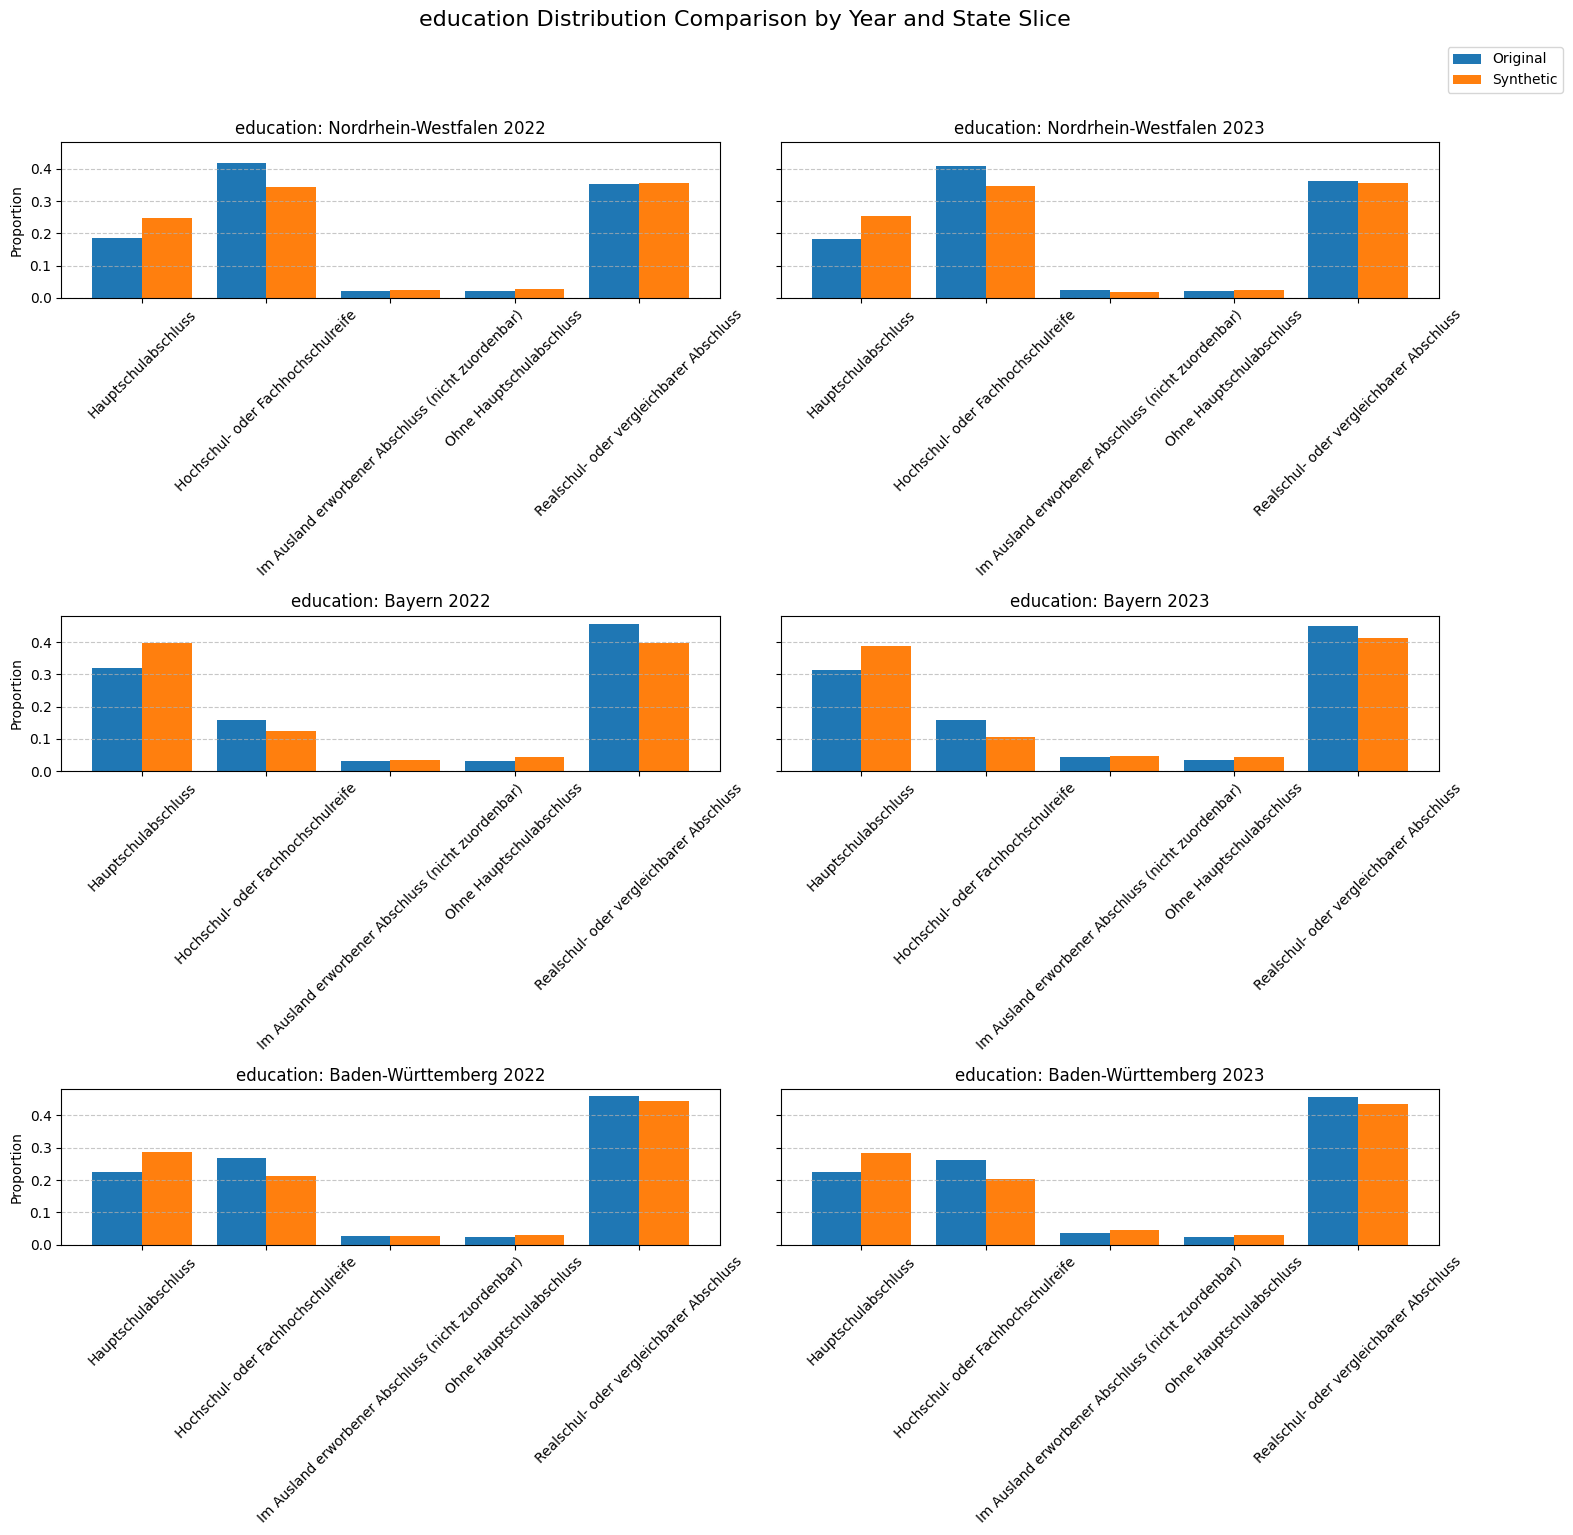

In [67]:
# Assuming you have df_areas_new and synthetic_population
# And the previously defined `extract_1d_marginals` function to get the
# `gender_m_df` for original data (as used in `build_synthetic_population_recommended`).

# First, ensure you have the gender_m_df available for comparison:

# Select a few representative (year, state) combinations
# You might want to pick the largest states, or the most recent years.
# For example, let's pick the top 3 states by total count across all years:
top_states = df_areas_new.groupby('state')['count'].sum().nlargest(3).index.tolist()
# And a couple of representative years:
sample_years = sorted(df_areas_new['year'].unique())[-2:] # Last two years


fig, axes = plt.subplots(len(top_states), len(sample_years), figsize=(15, 5 * len(top_states)), sharey=True)
axes = axes.flatten() # Flatten for easier iteration

plot_idx = 0
for state in top_states:
    for year in sample_years:
        ax = axes[plot_idx]

        # Get original gender distribution for this slice
        original_slice = edu_m_df.query("year == @year and state == @state")
        if not original_slice.empty:
            orig_dist = original_slice.set_index('education')['education_count']
            orig_prop = orig_dist / orig_dist.sum()
        else:
            orig_prop = pd.Series(dtype=float)

        # Get synthetic gender distribution for this slice
        synthetic_slice = synthetic_population.query("year == @year and state == @state")
        if not synthetic_slice.empty:
            synth_prop = synthetic_slice['education'].value_counts(normalize=True)
        else:
            synth_prop = pd.Series(dtype=float)

        # Combine for plotting
        comparison_df_slice = pd.DataFrame({
            'Original': orig_prop,
            'Synthetic': synth_prop
        }).fillna(0).sort_index()

        comparison_df_slice.plot(kind='bar', ax=ax, width=0.8, legend=False)
        ax.set_title(f'education: {state} {year}')
        ax.set_xlabel('') # Clear x-label, categories are clear from ticks
        if plot_idx % len(sample_years) == 0: # Only put Y-label on the left-most plots
            ax.set_ylabel('Proportion')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        plot_idx += 1

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1.0))
plt.suptitle('education Distribution Comparison by Year and State Slice', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

In [58]:
def calculate_distribution_divergence(original_s, synthetic_s, metric='sad'):
    """
    Calculates the divergence between two probability distributions.
    original_s: Pandas Series of original proportions (index = categories)
    synthetic_s: Pandas Series of synthetic proportions (index = categories)
    metric: 'sad' (Sum of Absolute Differences) or 'kl' (Kullback-Leibler Divergence)
    """
    # Ensure both series have the same index (all categories) and are normalized
    all_categories = sorted(list(set(original_s.index.tolist() + synthetic_s.index.tolist())))
    
    p = original_s.reindex(all_categories, fill_value=0).values
    q = synthetic_s.reindex(all_categories, fill_value=0).values

    # Normalize to sum to 1 (in case of small rounding errors or initial counts)
    p = p / p.sum() if p.sum() > 0 else np.zeros_like(p)
    q = q / q.sum() if q.sum() > 0 else np.zeros_like(q)

    if metric == 'sad':
        return np.sum(np.abs(p - q))
    elif metric == 'kl':
        # Add a small epsilon to avoid log(0) if there are zero probabilities
        epsilon = 1e-10
        return entropy(p + epsilon, q + epsilon)
    else:
        raise ValueError("Metric must be 'sad' or 'kl'")

def quantify_marginal_comparison(original_df_m, synthetic_df, feature, group_cols, metric='sad'):
    """
    Calculates divergence for each (year, state) slice and overall.
    """
    years = sorted(synthetic_df['year'].unique())
    states = sorted(synthetic_df['state'].unique())
    original_count_col = f"{feature}_count"

    results = []

    # Overall comparison
    original_overall = original_df_m.groupby(feature)[original_count_col].sum().sort_index()
    synthetic_overall = synthetic_df[feature].value_counts().sort_index()
    overall_divergence = calculate_distribution_divergence(original_overall, synthetic_overall, metric=metric)
    results.append({'year': 'Overall', 'state': 'Overall', 'divergence': overall_divergence})

    # Per year/state comparison
    for yr in years:
        for st in states:
            original_slice_df = original_df_m.query("year == @yr and state == @st")
            synthetic_slice_df = synthetic_df.query("year == @yr and state == @st")

            if original_slice_df.empty or synthetic_slice_df.empty:
                results.append({'year': yr, 'state': st, 'divergence': np.nan}) # No data for comparison
                continue

            original_slice_dist = original_slice_df.set_index(feature)[original_count_col]
            synthetic_slice_dist = synthetic_slice_df[feature].value_counts()

            divergence = calculate_distribution_divergence(original_slice_dist, synthetic_slice_dist, metric=metric)
            results.append({'year': yr, 'state': st, 'divergence': divergence})

    return pd.DataFrame(results)

# Example usage for 'new' contracts with SAD:
# sad_results_age_new = quantify_marginal_comparison(age_m_df, synth_new, 'age', group_cols, metric='sad')
# print("\nSAD for Age (New Contracts):")
# print(sad_results_age_new)

# Example usage for 'new' contracts with KL Divergence:
# kl_results_gender_new = quantify_marginal_comparison(gender_m_df, synth_new, 'gender', group_cols, metric='kl')
# print("\nKL Divergence for Gender (New Contracts):")
# print(kl_results_gender_new)

In [59]:
sad_results_age_new = quantify_marginal_comparison(age_m_df, synth_new, 'age', group_cols, metric='sad')
print("\nSAD for Age (New Contracts):")
print(sad_results_age_new)


SAD for Age (New Contracts):
        year               state  divergence
0    Overall             Overall    0.031335
1       2013   Baden-Württemberg    0.077342
2       2013              Bayern    0.072145
3       2013              Berlin    0.041964
4       2013         Brandenburg    0.084120
..       ...                 ...         ...
172     2023            Saarland    0.073630
173     2023             Sachsen    0.069396
174     2023      Sachsen-Anhalt    0.086959
175     2023  Schleswig-Holstein    0.084996
176     2023           Thüringen    0.063016

[177 rows x 3 columns]


In [60]:
kl_results_gender_new = quantify_marginal_comparison(gender_m_df, synth_new, 'gender', group_cols, metric='kl')
print("\nKL Divergence for Gender (New Contracts):")
print(kl_results_gender_new)


KL Divergence for Gender (New Contracts):
        year               state  divergence
0    Overall             Overall    0.000046
1       2013   Baden-Württemberg    0.000451
2       2013              Bayern    0.000065
3       2013              Berlin    0.000101
4       2013         Brandenburg    0.001908
..       ...                 ...         ...
172     2023            Saarland    0.000104
173     2023             Sachsen    0.000050
174     2023      Sachsen-Anhalt    0.000276
175     2023  Schleswig-Holstein    0.000871
176     2023           Thüringen    0.000408

[177 rows x 3 columns]
